In this notebook, we clusterize our 200k entries so that each future customer could compare with persons owning his group.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_stats_resampled_data.csv', index_col = 0)

In [3]:
X.shape

(295736, 15)

In [4]:
X.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,283500.0,180000.0,9000.0,180000.0,9894,9025.0,3639,2,0,0,0,0.445371,0.598926,57.5,0.634921
1,180000.0,180000.0,9000.0,180000.0,1635,4611.0,3955,2,0,1,1,0.588700,0.567379,42.5,1.000000
2,135000.0,573408.0,35208.0,495000.0,1175,4482.0,1899,2,0,0,0,0.614049,0.481249,27.5,4.247467
3,202500.0,562491.0,22437.0,454500.0,613,5187.0,2156,2,0,0,0,0.435848,0.634706,52.5,2.777733
4,112500.0,760225.5,34483.5,679500.0,602,2205.0,2386,2,0,1,1,0.500237,0.337673,32.5,6.757560


In [5]:
X_stats = X

In [6]:
X_stats.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,283500.0,180000.0,9000.0,180000.0,9894,9025.0,3639,2,0,0,0,0.445371,0.598926,57.5,0.634921
1,180000.0,180000.0,9000.0,180000.0,1635,4611.0,3955,2,0,1,1,0.588700,0.567379,42.5,1.000000
2,135000.0,573408.0,35208.0,495000.0,1175,4482.0,1899,2,0,0,0,0.614049,0.481249,27.5,4.247467
3,202500.0,562491.0,22437.0,454500.0,613,5187.0,2156,2,0,0,0,0.435848,0.634706,52.5,2.777733
4,112500.0,760225.5,34483.5,679500.0,602,2205.0,2386,2,0,1,1,0.500237,0.337673,32.5,6.757560


Wall time: 2h 55min 17s


Text(0, 0.5, 'Inertia')

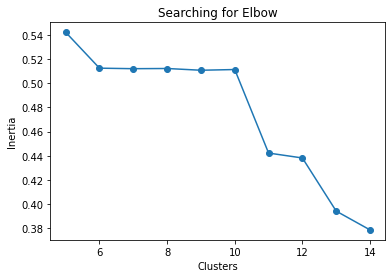

In [7]:
%%time
from sklearn import cluster, metrics

# Initialization, empty list
silhouettes = []

for num_clusters in range(5, 15):
    
    # Creating KMEANS for each number of clusters
    cls = cluster.KMeans(n_clusters=num_clusters)
    
    # Fitting model
    cls.fit(X_stats)
    
    # Silhouette_score for each model
    silh = metrics.silhouette_score(X_stats,cls.labels_)
    
    # Adding score in empty list for each model
    silhouettes.append(silh)
    
    

plt.plot(range(5, 15), silhouettes, marker = 'o')
plt.title('Searching for Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

Here 14 clusters so 14 groups is too much. We want that each person could compare with a group relatively populated...
So we take 11 clusters

In [9]:
from sklearn import cluster, metrics
from sklearn.decomposition import PCA

cls = cluster.KMeans(n_clusters = 11)

# Creating PCA
pca = PCA(n_components = 2)

# Fit
pca.fit(X_stats)

# We want to see the explained variance of our 2 features
print (pca.explained_variance_ratio_.cumsum())

# Transforming our X in 2 dimensions
X_trans_2= pca.transform(X_stats)

[0.55530417 0.99571672]


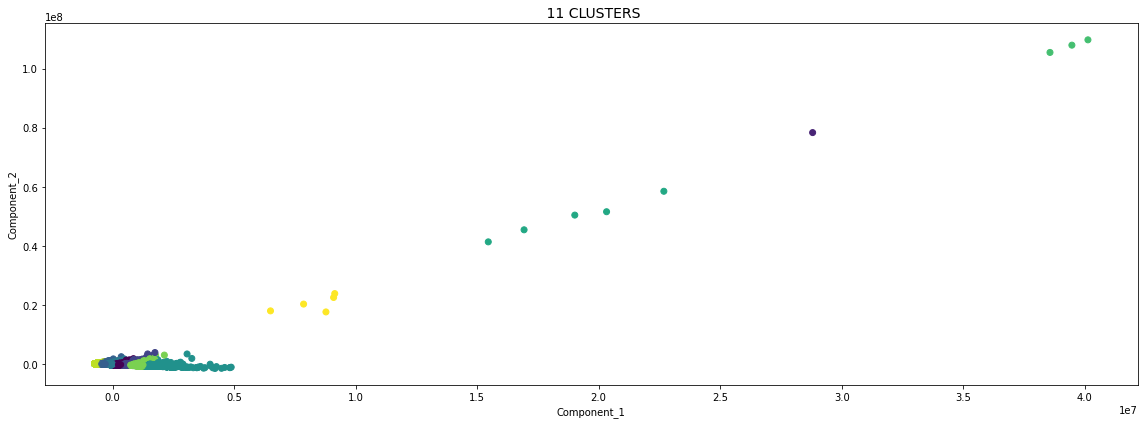

In [10]:
fig = plt.figure(figsize = [16,6])

# 3 clusters
cls = cluster.KMeans(n_clusters = 11)
cls.fit(X_trans_2)

# 
ax = fig.gca()  

# Spatial coordinates of each point in function of our 3 components
x = X_trans_2[:,0]
y = X_trans_2[:,1]


# Plotting scatters distinguishing our 2 clusters
ax.scatter(x, y, label='', marker = 'o',c = cls.labels_)

# Naming axes
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')


# Title
plt.title(" 11 CLUSTERS", fontsize = 14)

plt.tight_layout()
plt.show()


In [11]:
X_stats.shape

(295736, 15)

In [12]:
from sklearn import cluster

# fitting with our data
km = cluster.KMeans(n_clusters = 11).fit(X_stats)

In [13]:
km

KMeans(n_clusters=11)

In [14]:
import pickle

In [15]:
# Keeping clustering
pickle.dump (km, open ('clustering_11', 'wb'))

In [16]:
# Labels
km.labels_

array([ 3,  3,  1, ...,  0, 10,  8])

In [17]:
#check
km.labels_.shape

(295736,)

### Building stats tables

In this part we want that consumers could compare with other people... So once their informations given, they could have stats of the group they bring to.
But they don't want normalized datas, so we make some changes on X

In [18]:
X_stats.head(7)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,283500.0,180000.0,9000.0,180000.0,9894,9025.0,3639,2,0,0,0,0.445371,0.598926,57.5,0.634921
1,180000.0,180000.0,9000.0,180000.0,1635,4611.0,3955,2,0,1,1,0.588700,0.567379,42.5,1.000000
2,135000.0,573408.0,35208.0,495000.0,1175,4482.0,1899,2,0,0,0,0.614049,0.481249,27.5,4.247467
3,202500.0,562491.0,22437.0,454500.0,613,5187.0,2156,2,0,0,0,0.435848,0.634706,52.5,2.777733
4,112500.0,760225.5,34483.5,679500.0,602,2205.0,2386,2,0,1,1,0.500237,0.337673,32.5,6.757560
5,180000.0,450000.0,21109.5,450000.0,2298,6324.0,4001,2,1,1,0,0.420014,0.722393,42.5,2.500000
6,135000.0,1339884.0,39307.5,1170000.0,6334,3148.0,5445,2,0,0,0,0.319706,0.692559,37.5,9.925067


In [19]:
X_stats.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/Xglobal.csv')

In [20]:
X_describe = X_stats.describe()

In [21]:
X_describe.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/Xglobal_describe.csv')

In [22]:
# Adding membership group on your DataFrame

MEMBERSHIP = km.labels_
X_stats['MEMBERSHIP'] = MEMBERSHIP
X_stats.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
0,283500.0,180000.0,9000.0,180000.0,9894,9025.0,3639,2,0,0,0,0.445371,0.598926,57.5,0.634921,3
1,180000.0,180000.0,9000.0,180000.0,1635,4611.0,3955,2,0,1,1,0.588700,0.567379,42.5,1.000000,3
2,135000.0,573408.0,35208.0,495000.0,1175,4482.0,1899,2,0,0,0,0.614049,0.481249,27.5,4.247467,1
3,202500.0,562491.0,22437.0,454500.0,613,5187.0,2156,2,0,0,0,0.435848,0.634706,52.5,2.777733,1
4,112500.0,760225.5,34483.5,679500.0,602,2205.0,2386,2,0,1,1,0.500237,0.337673,32.5,6.757560,10


In [23]:
X_stats.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
0,283500.0,180000.0,9000.0,180000.0,9894,9025.0,3639,2,0,0,0,0.445371,0.598926,57.5,0.634921,3
1,180000.0,180000.0,9000.0,180000.0,1635,4611.0,3955,2,0,1,1,0.588700,0.567379,42.5,1.000000,3
2,135000.0,573408.0,35208.0,495000.0,1175,4482.0,1899,2,0,0,0,0.614049,0.481249,27.5,4.247467,1
3,202500.0,562491.0,22437.0,454500.0,613,5187.0,2156,2,0,0,0,0.435848,0.634706,52.5,2.777733,1
4,112500.0,760225.5,34483.5,679500.0,602,2205.0,2386,2,0,1,1,0.500237,0.337673,32.5,6.757560,10


In [24]:
stat = X_stats.describe()

In [25]:
stat.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/Xglobal_describe.csv')

In [26]:
X0 = X_stats[X_stats['MEMBERSHIP']== 0]

In [27]:
X0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
6,135000.0,1339884.0,39307.5,1170000.0,6334,3148.0,5445,2,0,0,0,0.319706,0.692559,37.5,9.925067,0
17,202500.0,1305000.0,38155.5,1305000.0,1306,3599.0,4344,1,0,1,1,0.676787,0.584990,42.5,6.444444,0
37,202500.0,1293502.5,35698.5,1129500.0,3264,7057.0,4389,2,0,0,0,0.700352,0.465069,37.5,6.387667,0
42,157500.0,1288350.0,37669.5,1125000.0,642,4338.0,1127,2,0,1,1,0.713207,0.406617,47.5,8.180000,0
67,225000.0,1305000.0,38286.0,1305000.0,3477,8702.0,2183,1,0,0,0,0.747346,0.483050,52.5,5.800000,0


In [28]:
# Dimensions
X0.shape

(21923, 16)

In [29]:
X0.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
X0.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X0.csv')

In [31]:
# Stat0
stat0 = X0.describe()
stat0

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,2.192300e+04,2.192300e+04,21923.000000,2.192300e+04,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000
mean,2.280189e+05,1.311779e+06,43870.785959,1.201679e+06,2680.466177,4700.075997,2944.845596,1.909821,0.046298,0.187292,0.150299,0.536231,0.501158,42.184806,6.908766
std,1.244917e+05,1.349628e+05,10661.332197,1.111902e+05,2346.727004,3135.005512,1433.652657,0.496990,0.210135,0.390155,0.357372,0.174666,0.182961,8.869529,2.865434
min,4.050000e+04,1.099372e+06,28552.500000,9.634631e+05,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000123,0.000527,22.500000,0.324451
25%,1.575000e+05,1.223010e+06,37669.500000,1.125000e+06,1005.500000,2091.886652,1793.000000,2.000000,0.000000,0.000000,0.000000,0.431355,0.369967,37.500000,4.951903
50%,2.025000e+05,1.288350e+06,41364.000000,1.129500e+06,2015.000000,4385.000000,3087.000000,2.000000,0.000000,0.000000,0.000000,0.580053,0.513694,42.500000,6.490243
75%,2.700000e+05,1.354500e+06,47833.895625,1.346739e+06,3618.000000,6920.000000,4205.000000,2.000000,0.000000,0.000000,0.000000,0.670658,0.646330,47.500000,8.486550
max,3.825000e+06,1.724220e+06,137844.000000,1.548335e+06,16424.000000,22928.000000,6166.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.882530,67.500000,32.222222


In [32]:
stat0.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat0.csv')

In [33]:
#########################################################################################################################

In [34]:
X1 = X_stats[X_stats['MEMBERSHIP']== 1]

In [35]:
# Dimensions
X1.shape

(80136, 16)

In [36]:
X1.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
X1.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X1.csv')

In [38]:
# Stat1
stat1 = X1.describe()
stat1

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,8.013600e+04,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000,80136.000000
mean,1.723939e+05,519617.320312,27839.515802,451174.089234,2046.279637,4304.358118,2764.161376,1.980171,0.052860,0.208396,0.144692,0.459646,0.424023,38.046820,3.585486
std,8.089703e+04,65533.777436,7703.998186,45180.283013,1941.430751,2962.978177,1372.918818,0.445655,0.223756,0.406164,0.351792,0.189928,0.189666,9.066244,1.590542
min,2.700000e+04,135000.000000,6750.000000,135000.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000012,0.000527,22.500000,0.222222
25%,1.131974e+05,452385.000000,22270.500000,450000.000000,782.000000,1818.989766,1646.000000,2.000000,0.000000,0.000000,0.000000,0.317970,0.276837,32.500000,2.489200
50%,1.575000e+05,521280.000000,26640.000000,450000.000000,1448.000000,3941.000000,2804.000000,2.000000,0.000000,0.000000,0.000000,0.491362,0.418007,37.500000,3.309714
75%,2.025000e+05,562491.000000,31261.500000,459000.000000,2640.000000,6217.000000,3977.000000,2.000000,0.000000,0.000000,0.000000,0.613886,0.570917,42.500000,4.389333
max,2.025000e+06,697302.000000,72306.000000,900000.000000,16429.000000,22442.000000,7197.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.893976,67.500000,20.541143


In [39]:
stat1.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat1.csv')

In [40]:
###############################################################################################################################

In [41]:
X2 = X_stats[X_stats['MEMBERSHIP']== 2]

In [42]:
X2

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
197723,8.365028e+07,660274.256744,35307.656511,583570.457023,958,4804.938413,2619,2,0,0,0,0.271256,0.206891,32.5,0.141377,2


In [43]:
# Dimensions
X2.shape

(1, 16)

In [44]:
X2.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
X2.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X2.csv')

In [46]:
# Stat2
stat2 = X2.describe()
stat2

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,1.000000e+00,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.000000
mean,8.365028e+07,660274.256744,35307.656511,583570.457023,958.0,4804.938413,2619.0,2.0,0.0,0.0,0.0,0.271256,0.206891,32.5,0.141377
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.365028e+07,660274.256744,35307.656511,583570.457023,958.0,4804.938413,2619.0,2.0,0.0,0.0,0.0,0.271256,0.206891,32.5,0.141377
25%,8.365028e+07,660274.256744,35307.656511,583570.457023,958.0,4804.938413,2619.0,2.0,0.0,0.0,0.0,0.271256,0.206891,32.5,0.141377
50%,8.365028e+07,660274.256744,35307.656511,583570.457023,958.0,4804.938413,2619.0,2.0,0.0,0.0,0.0,0.271256,0.206891,32.5,0.141377
75%,8.365028e+07,660274.256744,35307.656511,583570.457023,958.0,4804.938413,2619.0,2.0,0.0,0.0,0.0,0.271256,0.206891,32.5,0.141377
max,8.365028e+07,660274.256744,35307.656511,583570.457023,958.0,4804.938413,2619.0,2.0,0.0,0.0,0.0,0.271256,0.206891,32.5,0.141377


In [47]:
stat2.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat2.csv')

In [48]:
###############################################################################################################################

In [49]:
X3 = X_stats[X_stats['MEMBERSHIP']== 3]

In [50]:
# Dimensions
X3.shape

(35290, 16)

In [51]:
X3.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
X3.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X3.csv')

In [53]:
# Stat3
stat3 = X3.describe()
stat3

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000,35290.000000
mean,127031.311414,158168.066418,11080.667826,143393.764544,1927.157183,4385.133836,2636.524370,2.054066,0.067753,0.225645,0.153075,0.447681,0.447702,36.327713,1.457922
std,57060.627942,43565.005383,3819.581740,40629.410682,1921.828724,2916.031449,1401.360287,0.390631,0.251325,0.418012,0.360064,0.188239,0.194714,9.655141,0.717145
min,26550.000000,45000.000000,1980.000000,40500.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000001,0.000527,22.500000,0.135417
25%,90000.000000,135000.000000,9000.000000,112500.000000,721.000000,1997.745208,1431.000000,2.000000,0.000000,0.000000,0.000000,0.304906,0.297087,27.500000,0.951823
50%,112500.000000,169341.945283,10125.000000,144000.000000,1319.000000,4066.005578,2632.000000,2.000000,0.000000,0.000000,0.000000,0.474254,0.446769,32.500000,1.333333
75%,157500.000000,180067.532076,13288.500000,180000.000000,2445.000000,6274.769971,3901.000000,2.000000,0.000000,0.000000,0.000000,0.601123,0.602386,42.500000,1.811200
max,810000.000000,315000.000000,26757.000000,270000.000000,17139.000000,19183.000000,6179.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.882530,67.500000,7.500000


In [54]:
stat3.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat3.csv')

In [55]:
###############################################################################################################################

In [56]:
X4 = X_stats[X_stats['MEMBERSHIP']== 4]

In [57]:
# Dimensions
X4.shape

(30990, 16)

In [58]:
X4.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
X4.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X4.csv')

In [60]:
# Stat4
stat4 = X4.describe()
stat4

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,3.099000e+04,3.099000e+04,30990.000000,3.099000e+04,30990.000000,30990.000000,30990.000000,30990.000000,30990.000000,30990.000000,30990.000000,30990.000000,30990.000000,30990.000000,30990.000000
mean,2.110494e+05,1.010724e+06,38355.918002,8.946358e+05,2386.146499,4569.820280,2869.520910,1.940045,0.049048,0.201065,0.152146,0.505983,0.469605,40.643917,5.814974
std,1.204120e+05,9.380893e+04,10422.608895,6.072053e+04,2156.663442,3099.930359,1422.924433,0.483641,0.215972,0.400803,0.359168,0.181791,0.187358,8.888661,2.560841
min,2.700000e+04,6.750000e+05,21960.000000,6.750000e+05,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000016,0.000527,22.500000,0.170884
25%,1.350000e+05,9.062280e+05,31211.872686,9.000000e+05,907.000000,1984.000000,1700.250000,2.000000,0.000000,0.000000,0.000000,0.388325,0.331251,32.500000,4.000000
50%,1.800000e+05,1.011062e+06,35694.000000,9.000000e+05,1753.000000,4182.086556,2986.000000,2.000000,0.000000,0.000000,0.000000,0.547060,0.475850,42.500000,5.405405
75%,2.475000e+05,1.078200e+06,44302.500000,9.041496e+05,3133.000000,6716.344606,4109.000000,2.000000,0.000000,0.000000,0.000000,0.648894,0.617826,47.500000,7.072000
max,4.500000e+06,1.258215e+06,108396.000000,1.350000e+06,16495.000000,21865.000000,6214.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.885488,67.500000,33.333333


In [61]:
stat4.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat4.csv')

In [62]:
###########################################################################################################################

In [63]:
X5 = X_stats[X_stats['MEMBERSHIP']== 5]

In [64]:
# Dimensions
X5.shape

(5680, 16)

In [65]:
X5.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
X5.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X5.csv')

In [67]:
# Stat5
stat5 = X5.describe()
stat5

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,5.680000e+03,5.680000e+03,5680.000000,5.680000e+03,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000
mean,3.015870e+05,1.895339e+06,58838.145510,1.761813e+06,2649.302289,4387.895026,3009.625352,1.786620,0.049824,0.184507,0.150704,0.577187,0.500953,42.280810,7.412271
std,1.648694e+05,2.713473e+05,16249.275623,2.421045e+05,2366.952800,3090.365341,1466.288311,0.552155,0.217600,0.387931,0.357792,0.155536,0.186323,8.786687,2.851336
min,5.400000e+04,1.506816e+06,39816.000000,1.350000e+06,20.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.004792,0.000527,22.500000,0.390000
25%,2.025000e+05,1.746000e+06,48586.500000,1.575000e+06,967.750000,1755.219566,1784.750000,1.000000,0.000000,0.000000,0.000000,0.495884,0.358951,37.500000,5.333333
50%,2.700000e+05,1.800000e+06,55507.500000,1.786603e+06,2002.500000,3941.000000,3214.000000,2.000000,0.000000,0.000000,0.000000,0.615909,0.519976,42.500000,7.000000
75%,3.600000e+05,2.013840e+06,64890.979423,1.800000e+06,3571.000000,6506.575920,4283.000000,2.000000,0.000000,0.000000,0.000000,0.693439,0.651260,47.500000,9.108017
max,4.500000e+06,4.050000e+06,258025.500000,4.050000e+06,16632.000000,16970.000000,6207.000000,3.000000,1.000000,1.000000,1.000000,0.815058,0.882530,67.500000,31.938667


In [68]:
stat5.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat5.csv')

In [69]:
#########################################################################################################################

In [70]:
X6 = X_stats[X_stats['MEMBERSHIP']== 6]

In [71]:
# Dimensions
X6.shape

(5, 16)

In [72]:
X6.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
X6.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X6.csv')

In [74]:
# Stat6
stat6 = X6.describe()
stat6

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,5.000000e+00,5.000000e+00,5.000000,5.000000e+00,5.000000,5.000000,5.00000,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,5.313078e+07,1.120098e+06,48749.529045,1.000005e+06,1282.600000,4410.694969,2732.80000,1.600000,0.0,0.0,0.0,0.366000,0.203576,35.500000,0.602832
std,7.058221e+06,3.944579e+05,11311.535935,3.264162e+05,453.278943,1639.981762,1230.71918,0.547723,0.0,0.0,0.0,0.131945,0.065509,2.738613,0.323619
min,4.435964e+07,7.627614e+05,33325.574630,7.188498e+05,869.000000,2499.246090,1413.00000,1.000000,0.0,0.0,0.0,0.135263,0.150546,32.500000,0.284516
25%,4.869627e+07,7.754766e+05,44859.200685,7.356335e+05,996.000000,2753.732534,1546.00000,1.000000,0.0,0.0,0.0,0.381975,0.157668,32.500000,0.302275
50%,5.408307e+07,9.852507e+05,46044.229718,8.436012e+05,1000.000000,5388.617029,2832.00000,2.000000,0.0,0.0,0.0,0.418291,0.159306,37.500000,0.560547
75%,5.560389e+07,1.476746e+06,57635.560009,1.294247e+06,1720.000000,5552.071889,3918.00000,2.000000,0.0,0.0,0.0,0.436956,0.271191,37.500000,0.874655
max,6.291102e+07,1.600257e+06,61883.080186,1.407693e+06,1828.000000,5859.807305,3955.00000,2.000000,0.0,0.0,0.0,0.457514,0.279168,37.500000,0.992167


In [75]:
stat6.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat6.csv')

In [76]:
###############################################################################################################################

In [77]:
X7 = X_stats[X_stats['MEMBERSHIP']== 7]

In [78]:
# Dimensions
X7.shape

(3, 16)

In [79]:
X7.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
X7.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X7.csv')

In [81]:
# Stat7
stat7 = X7.describe()
stat7

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,3.000000e+00,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.000000,3.000000,3.0,3.000000
mean,1.148470e+08,562329.003156,26233.278519,455255.425699,918.0,6736.819143,3617.333333,1.333333,0.0,0.0,0.0,0.124866,0.148258,32.5,0.011277
std,2.278625e+06,171.452127,41.041908,799.517692,4.0,26.650590,27.098585,0.577350,0.0,0.0,0.0,0.012388,0.002873,0.0,0.006847
min,1.124607e+08,562149.447142,26194.500000,454500.000000,914.0,6708.908882,3589.000000,1.000000,0.0,0.0,0.0,0.113161,0.145543,32.5,0.004808
25%,1.137706e+08,562248.004734,26211.787618,454836.771782,916.0,6724.228715,3604.500000,1.000000,0.0,0.0,0.0,0.118379,0.146753,32.5,0.007692
50%,1.150804e+08,562346.562325,26229.075236,455173.543564,918.0,6739.548548,3620.000000,1.000000,0.0,0.0,0.0,0.123598,0.147963,32.5,0.010575
75%,1.160402e+08,562418.781162,26252.667779,455633.138548,920.0,6750.774274,3631.500000,1.500000,0.0,0.0,0.0,0.130719,0.149615,32.5,0.014511
max,1.170000e+08,562491.000000,26276.260321,456092.733533,922.0,6762.000000,3643.000000,2.000000,0.0,0.0,0.0,0.137840,0.151267,32.5,0.018447


In [82]:
stat7.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat7.csv')

In [83]:
##################################################################################################################

In [84]:
X8 = X_stats[X_stats['MEMBERSHIP']== 8]

In [85]:
# Dimensions
X8.shape

(72721, 16)

In [86]:
X8.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [87]:
X8.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X8.csv')

In [88]:
# Stat8
stat8 = X8.describe()
stat8

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,7.272100e+04,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000,72721.000000
mean,1.468837e+05,296723.955525,18664.987142,260179.608100,2006.724027,4368.800795,2719.277788,2.015085,0.057549,0.207052,0.144882,0.452887,0.433117,37.258185,2.398522
std,6.899519e+04,51402.508115,5535.995143,43208.053924,1968.524326,2917.095531,1368.497362,0.432082,0.232890,0.405196,0.351985,0.190530,0.195523,9.444465,1.109693
min,2.700000e+04,135000.000000,5935.500000,144000.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000005,0.000527,22.500000,0.066667
25%,1.035000e+05,255960.000000,14233.500000,225000.000000,745.000000,2015.000000,1599.000000,2.000000,0.000000,0.000000,0.000000,0.307739,0.278466,27.500000,1.646000
50%,1.350000e+05,284400.000000,17730.000000,247500.000000,1400.000000,4018.140080,2724.000000,2.000000,0.000000,0.000000,0.000000,0.481358,0.427657,37.500000,2.211200
75%,1.800000e+05,335796.515191,22020.319322,283500.000000,2569.000000,6237.000000,3936.000000,2.000000,0.000000,0.000000,0.000000,0.608166,0.588838,42.500000,2.941176
max,2.700000e+06,453816.000000,47367.000000,540000.000000,17912.000000,22701.000000,6259.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.885488,67.500000,12.903226


In [89]:
stat8.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat8.csv')

In [ ]:
############################################################################################################################

In [90]:
X9 = X_stats[X_stats['MEMBERSHIP']== 9]

In [91]:
# Dimensions
X9.shape

(5, 16)

In [92]:
X9.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [93]:
X9.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X9.csv')

In [98]:
# Stat9
stat9 = X9.describe()
stat9

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,5.000000e+00,5.000000e+00,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.0,5.000000
mean,2.228684e+07,1.112520e+06,53866.588344,1.017878e+06,1228.000000,3041.713085,2286.600000,1.800000,0.0,0.0,0.0,0.472302,0.309096,37.5,0.693958
std,2.819161e+06,6.566981e+05,17235.201110,5.650322e+05,635.502557,1899.831651,1496.181907,0.447214,0.0,0.0,0.0,0.185211,0.176366,5.0,0.528794
min,1.936232e+07,5.023128e+05,36677.376780,4.696965e+05,844.000000,1186.404475,726.000000,1.000000,0.0,0.0,0.0,0.145652,0.152898,32.5,0.307938
25%,1.981154e+07,8.300057e+05,46683.216143,8.076100e+05,894.000000,1407.885216,842.000000,2.000000,0.0,0.0,0.0,0.510444,0.167330,32.5,0.378433
50%,2.198789e+07,8.410719e+05,51126.206964,8.222169e+05,1021.000000,2590.553620,2451.000000,2.000000,0.0,0.0,0.0,0.545675,0.313379,37.5,0.393888
75%,2.451038e+07,1.183959e+06,52157.543263,1.026490e+06,1025.000000,4587.970309,3277.000000,2.000000,0.0,0.0,0.0,0.563567,0.320322,42.5,0.821760
max,2.576208e+07,2.205248e+06,82688.598572,1.963379e+06,2356.000000,5435.751805,4137.000000,2.000000,0.0,0.0,0.0,0.596173,0.591550,42.5,1.567772


In [99]:
stat9.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat9.csv')

In [ ]:
############################################################################################################################

In [94]:
X10 = X_stats[X_stats['MEMBERSHIP']== 10]

In [95]:
# Dimensions
X10.shape

(48982, 16)

In [96]:
X10.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [97]:
X10.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X10.csv')

In [100]:
# Stat10
stat10 = X10.describe()
stat10

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,4.898200e+04,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000,48982.000000
mean,1.869044e+05,759697.835071,33441.954408,671297.060630,2368.531318,4594.100844,2833.368768,1.959005,0.048610,0.194378,0.147422,0.491720,0.459321,40.272753,4.900414
std,9.061784e+04,77898.322878,10403.340753,46394.734616,2154.308850,3065.413130,1410.933639,0.468342,0.215053,0.395725,0.354529,0.182761,0.189259,8.999980,2.234103
min,2.700000e+04,540000.000000,16024.500000,495000.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000019,0.000527,22.500000,0.300000
25%,1.347267e+05,677664.000000,26154.000000,675000.000000,877.000000,2015.100724,1665.000000,2.000000,0.000000,0.000000,0.000000,0.366345,0.315472,32.500000,3.333333
50%,1.710000e+05,755190.000000,31391.258789,675000.000000,1741.000000,4288.000000,2939.000000,2.000000,0.000000,0.000000,0.000000,0.529209,0.463275,37.500000,4.492500
75%,2.250000e+05,808650.000000,37786.287709,679500.000000,3128.000000,6738.563864,4083.000000,2.000000,0.000000,0.000000,0.000000,0.636612,0.609276,47.500000,6.000000
max,2.250000e+06,969082.286650,89536.500000,900000.000000,16767.000000,20136.000000,6255.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.885488,67.500000,25.671429


In [101]:
stat10.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat10.csv')